# Auto differentiation in stochastic variational inference (SVI)

Rowan Callahan 2025/11/19 for computational biology journal club

Optimization is a useful tool for finding and fitting optimal coefficients that we care about for various models so that we can predict future data points. The goal is to find a function that can approximate the generating function and can successfully map inputs to outputs. Previously we have worked with fitting polynomial curves with pytorch so we are going to start today with a brief excercise in polynomial curve fitting with pytorch. The main point that I want to emphasize today is that much of the magic of pytorch doesn't come from the fancy feature and object oriented code, but that most of pytorch has its magic come from the optimizers and their ability to seamlessly propagate gradients through what looks like plain python code.

tensor([-1.2968,  2.3376], requires_grad=True)
20.562089920043945
tensor([-1.5017,  1.0019], requires_grad=True)
0.009102489799261093
tensor([-1.5017,  1.0019], requires_grad=True)
0.009102489799261093
tensor([-1.5017,  1.0019], requires_grad=True)
0.009102489799261093
tensor([-1.5017,  1.0019], requires_grad=True)
0.009102489799261093
tensor([-1.5017,  1.0019], requires_grad=True)
0.009102489799261093
tensor([-1.5017,  1.0019], requires_grad=True)
0.009102489799261093
tensor([-1.5017,  1.0019], requires_grad=True)
0.009102489799261093
tensor([-1.5017,  1.0019], requires_grad=True)
0.009102489799261093
tensor([-1.5017,  1.0019], requires_grad=True)
0.009102489799261093
tensor([-1.5017,  1.0019], requires_grad=True)
0.009102489799261093
tensor([-1.5017,  1.0019], requires_grad=True)
0.009102489799261093
tensor([-1.5017,  1.0019], requires_grad=True)
0.009102489799261093
tensor([-1.5017,  1.0019], requires_grad=True)
0.009102489799261093
tensor([-1.5017,  1.0019], requires_grad=True)
0.0

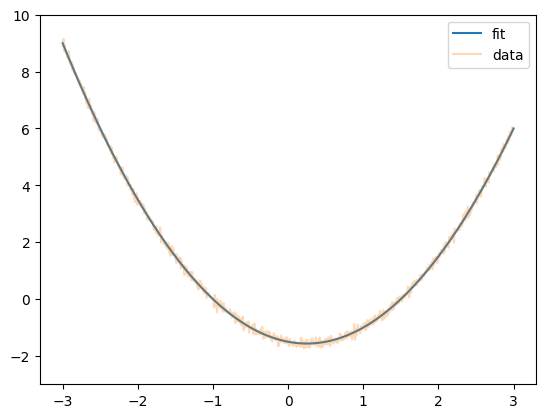

In [99]:
import torch
import matplotlib.pyplot as plt

#this will create our sine space with noise added to examine
x = torch.linspace(-3, 3, 1000)
y =(x-1.5)*(x+1.0)  + torch.randn(1000) *0.1

#this will calculate our factored polynomial (x+a1)(x+a2)...(x+an)
def calculate_polynomial(parameters, x):
    #find the degree of the polynomial by seeing how many parameters we have
    degree=parameters.shape[0]
    #expand out x so we can add our factors 
    x = x.unsqueeze(1).repeat(1, degree)
    #add our parameter to each copy of x
    pre_factored = parameters+x
    #return the product of all of these to get our y hat
    return(torch.prod(pre_factored, dim=1))

#lets create a random tensor of parameters to start of degree 10
parameter_tensor=torch.randn(2,dtype=torch.float32, requires_grad=True)
#here we define our optimizer ( we can try playing with the learning rate here!)
optimizer = torch.optim.SGD([parameter_tensor], lr=0.1)

#now we use this optimizer to find the best parameter choices to calculate our polynomial
for epoch in range(10000):
    optimizer.zero_grad()
    y_hat = calculate_polynomial(parameter_tensor, x)
    loss = torch.mean((y-y_hat)**2)
    loss.backward()
    optimizer.step()
    if epoch %100 ==0:
        print(parameter_tensor)
        print(loss.item())

#now we compare the true data with what we fitted
plt.plot(x, y_hat.detach().numpy(), label="fit")
plt.plot(x, y,alpha=0.3, label="data")
plt.legend()
plt.ylim(-3,10)
plt.show()



### Questions
Were you able to successfully get a parabola drawn? 

Discuss with your groups why the loss has .backwards() called on it. Why is it called this do you think?

Why do we zero out the gradient at each step also?

# Maximum likelihood estimation

In statistical inference our goal is often to estimate the parameters $\theta$ of a statistical model given the data that we have available to us. There are different ways to do this and different models that we can use, but one example is linear regression, in linear regression we want to see how variables $\beta_i$ are connected to an output variable that is observed $Y$

In particular if we have multiple observed $x$ then we want to find values for our coefficients that make the observed $Y$ most likely. For a standard linear regression predictions are calculated with 
$$
Y = \beta_0 + \beta_1 x_{1} + \beta_2 x_{2} + \cdots + \beta_p x_{p} + \varepsilon,
\qquad i = 1,\dots,n.

$$

### Questions

If we assume that the error is normally distributed what log likelihood should we use to make sure that our error is small and that we maximize the probability of observing the $Y$ we observe? Does scaling matter? Why or why not?


How would this change if we were performing logistic regression? How would this change if we were performing poisson regression?

It is also possible to solve this entire problem in closed form without using gradient descent at all, what are some advantages to using gradient descent for a simple model like linear regression besides just for teaching?

Go into the code below and put in the correct error term for loss.


### Helpful information:

The probability density function for a normal distribution with mean $\mu$ and variance $\sigma^2$ is:

$$
p(y \mid \mu, \sigma^2)
= \frac{1}{\sqrt{2\pi\sigma^2}}
\exp\left( -\frac{1}{2\sigma^2} (y - \mu)^2 \right).
$$

The probability mass function for a Poisson distribution with rate $\lambda$ is:

$$
p(y \mid \lambda)
= \frac{\lambda^y e^{-\lambda}}{y!},
\qquad y = 0,1,2,\dots
$$

tensor([ 1.0220, -0.0080, -0.3494], requires_grad=True)
5.88313102722168
tensor([0.4692, 0.2034, 1.0026], requires_grad=True)
0.13852043449878693
tensor([0.4830, 0.1246, 1.1553], requires_grad=True)
0.09125357866287231
tensor([0.4924, 0.1051, 1.1842], requires_grad=True)
0.08929895609617233
tensor([0.4949, 0.1009, 1.1903], requires_grad=True)
0.08920701593160629
tensor([0.4955, 0.1000, 1.1917], requires_grad=True)
0.0892026424407959
tensor([0.4956, 0.0998, 1.1920], requires_grad=True)
0.08920243382453918
tensor([0.4956, 0.0997, 1.1920], requires_grad=True)
0.08920242637395859
tensor([0.4956, 0.0997, 1.1921], requires_grad=True)
0.08920241892337799
tensor([0.4956, 0.0997, 1.1921], requires_grad=True)
0.08920242637395859


<positron-console-cell-217>:33: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


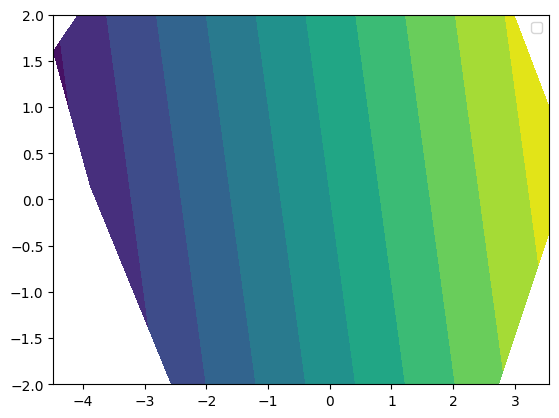

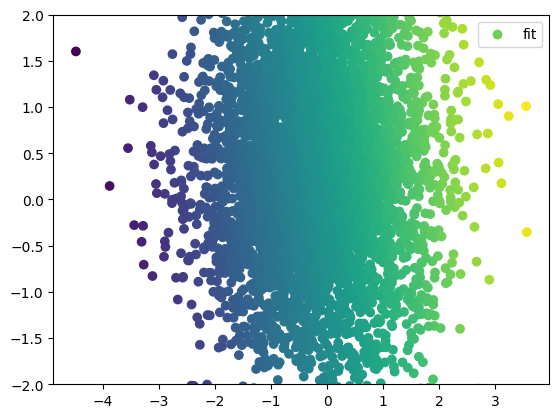

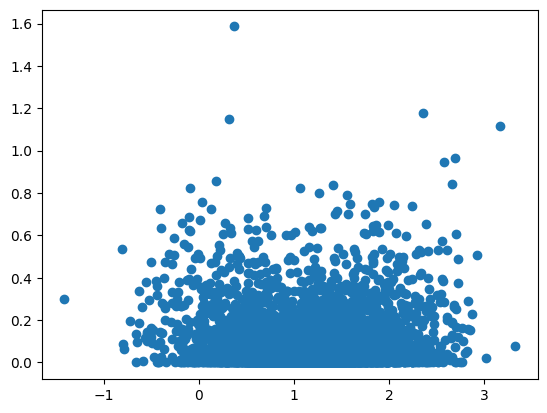

In [ ]:
import torch
import matplotlib.pyplot as plt
#this will create our sine space with noise added to examine
x1 = torch.randn(5000) -0.2
x2 = torch.randn(5000) +0.3
y = 0.5*x1 +0.1*x2 + 1.2 + torch.randn(5000) *0.3
x =torch.stack([x1,x2], dim=1)

#this will calculate our factored polynomial (x+a1)(x+a2)...(x+an)
def calculate_regression(parameters, x):
    y_hat = torch.sum(parameters[:-1]*x, dim=1) + parameters[-1]
    return(y_hat)

#lets create a random tensor of parameters to start of degree 10
parameter_tensor=torch.randn(3,dtype=torch.float32, requires_grad=True)
#here we define our optimizer ( we can try playing with the learning rate here!)
optimizer = torch.optim.Adam([parameter_tensor], lr=0.01)

#now we use this optimizer to find the best parameter choices to calculate our polynomial
for epoch in range(100):
    optimizer.zero_grad()
    y_hat = calculate_regression(parameter_tensor, x)
    loss = torch.mean(y-y_hat)#TODO put in your "correct" loss function here)
    loss.backward()
    optimizer.step()
    if epoch %10 ==0:
        print(parameter_tensor)
        print(loss.item())

#now we compare the true data with what we fitted
#plt.scatter(x1,x2,c=y_hat.detach().numpy(), label="fit")
plt.tricontourf(x1,x2,y_hat.detach().cpu().numpy(), levels=10, cmap="viridis")
plt.legend()
plt.ylim(-2,2)
plt.show()

plt.scatter(x1,x2,c=y_hat.detach().numpy(), label="fit")
#plt.tricontourf(x1,x2,y.detach().cpu().numpy(), levels=10, cmap="viridis")
plt.legend()
plt.ylim(-2,2)
plt.show()

plt.scatter(y.detach().cpu().numpy(), torch.square(y-y_hat).detach().cpu().numpy())
plt.show()

# Maximum a posteriori inference (MAP)

In Bayesian inference there is an extra wrinkle beyond simply calculating the parameters that make our observed $Y$ most likely. In particular we are interested in calculating the most likely parameters given the data using Bayes' rule.

Bayes' rule (for parameters $\theta$ and data $x$) is:

$$
p(\theta \mid x)
= \frac{p(x \mid \theta)\, p(\theta)}{p(x)}.
$$

Why don't frequentists do this? Well there are a few issues. Firstly, it requires you to pick priors or some level of knowledge about what you expect the parameters to be. Secondly, it can be very difficult to calculate the $p(x)$ term, and this can become a very difficult integral, leaving you without an exact solution.

The term $p(x)$ is just a normalization constant:

$$
p(x) = \int p(x \mid \theta)\, p(\theta)\, d\theta.
$$

This integral can be very hard or even impossible (although most integrals are impossible for me)

In terms of linear regression, this looks like adding an extra prior term on the coefficients and is essentially the same as performing penalized linear regression. For example, placing a Gaussian prior on $\beta$:

$$
\beta \sim \mathcal{N}(0, \tau^2 I)
$$

leads to a penalty of the form

$$
-\frac{1}{2\tau^2} \lVert \beta \rVert^2,
$$

we have decided to solve this problem with a bit of overkill again in the form of gradient descent and auto differentiation in order to make the final steps of this tutorial clear but for many models there are close form and well behaved solutions. However by showing you how to solve problems with auto differentiation it will allow us to solve much more complicated and poorly behaved models in the future such as auto encoders and other neural network functions.

### Questions

Compare the penalty with ridge regresssion and elastic net, how are they similar and different?

Do you understand why we use log prob in this model to calculate probabilities but not the previous one?


parameter_tensor: tensor([ 0.7417,  0.4985, -0.2462], requires_grad=True)
overall_loss:  10164.1328125
prior_loss:  tensor(3.5949, grad_fn=<MeanBackward0>)
accuracy loss;  tensor(2.2265, grad_fn=<MeanBackward0>)
parameter_tensor: tensor([ 0.6429,  0.4733, -0.1465], requires_grad=True)
overall_loss:  9261.7373046875
prior_loss:  tensor(3.5949, grad_fn=<MeanBackward0>)
accuracy loss;  tensor(1.8656, grad_fn=<MeanBackward0>)
parameter_tensor: tensor([ 0.5501,  0.4405, -0.0486], requires_grad=True)
overall_loss:  8493.7177734375
prior_loss:  tensor(3.5949, grad_fn=<MeanBackward0>)
accuracy loss;  tensor(1.5584, grad_fn=<MeanBackward0>)
parameter_tensor: tensor([0.4688, 0.4095, 0.0464], requires_grad=True)
overall_loss:  7860.39111328125
prior_loss:  tensor(3.5949, grad_fn=<MeanBackward0>)
accuracy loss;  tensor(1.3051, grad_fn=<MeanBackward0>)
parameter_tensor: tensor([0.4042, 0.3805, 0.1376], requires_grad=True)
overall_loss:  7346.8671875
prior_loss:  tensor(3.5949, grad_fn=<MeanBackward

<positron-console-cell-239>:38: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


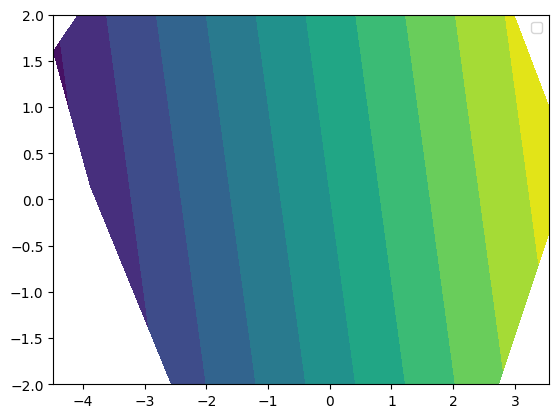

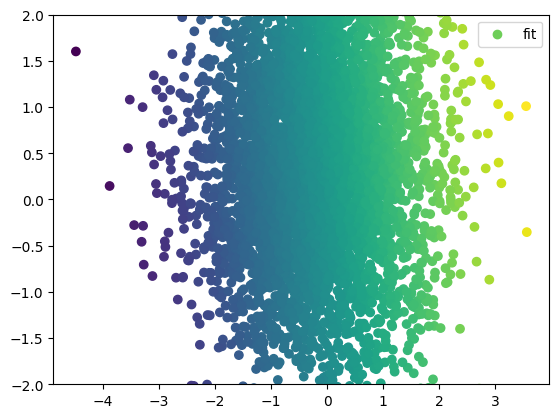

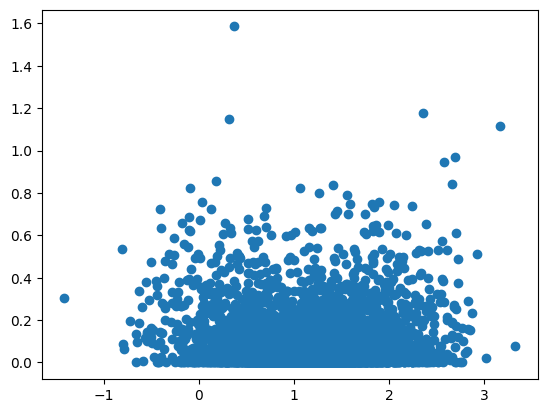

In [239]:
from torch.distributions import Normal
parameter_number = 3
#lets create a random tensor of parameters to start of degree 10
parameter_tensor=torch.randn(parameter_number,dtype=torch.float32, requires_grad=True)
#here we define our optimizer ( we can try playing with the learning rate here!)
optimizer = torch.optim.Adam([parameter_tensor], lr=0.01)

#now we are going to calculate a prior for things as well to see how that works and changes our regression
#now we use this optimizer to find the best parameter choices to calculate our polynomial
#we set up our priors for each parameter
relaxation = 1.0
dists = Normal(loc=torch.zeros(parameter_number), scale=relaxation*torch.ones(parameter_number))
for epoch in range(1000):
    optimizer.zero_grad()

    #now we calculate how different things are from the prior
    parameter_likelihood= torch.sum(dists.log_prob(parameter_tensor))
    #then we calculate how off our y hat is
    y_hat = calculate_regression(parameter_tensor, x)
    predicted_likelihood = Normal(loc=y_hat, scale=1.0)
    data_likelihood = torch.sum(predicted_likelihood.log_prob(y))
    #then we combine them in the loss, why don't we log the mean loss?
    #its already a log! its the sum of the square loss which is the same as the 
    #log prob with a normal distribution describing the errors!!
    total_likelihood= data_likelihood +parameter_likelihood 
    loss = - total_likelihood
    loss.backward()
    optimizer.step()
    if epoch %10 ==0:
        print("parameter_tensor:",parameter_tensor)
        print("overall_loss: ",loss.item())
        print("prior_loss: ",torch.mean(-prior_loss))
        print("accuracy loss; ",torch.mean((y-y_hat)**2))

#now we compare the true data with what we fitted
#plt.scatter(x1,x2,c=y_hat.detach().numpy(), label="fit")
plt.tricontourf(x1,x2,y_hat.detach().cpu().numpy(), levels=10, cmap="viridis")
plt.legend()
plt.ylim(-2,2)
plt.show()

plt.scatter(x1,x2,c=y_hat.detach().numpy(), label="fit")
#plt.tricontourf(x1,x2,y.detach().cpu().numpy(), levels=10, cmap="viridis")
plt.legend()
plt.ylim(-2,2)
plt.show()

plt.scatter(y.detach().cpu().numpy(), torch.square(y-y_hat).detach().cpu().numpy())
plt.show()

# Variatonal Inference

Variational inference is one way of solving for parameters when you want uncertainty around the parameters themselves. If a model does not have a closed form solution there are a few different alternatives. Variational inference is nice because you can solve it directly with optimization techniques, allowing us to have parts of our models be neural networks or some other complicated function if we wish.

Variational inference pairs well also with GPUs and pytorch meaning that we can take advantage of a huge amount of modern semiconductor engineering in GPUs as well as modern optimization libraries and routines, that have been perfected for large neural networks. Finally because we can blend our models with neural networks we can create hybrid models where we keep uncertainty in some parts of our models while allowing complicated deterministic functions in others where we can't manage as much variance.
 
Notably in variational inference we are trying to maximize the evidence lower bound. This means that we are trying to find the best possible approximation distribution that we have in the form of our guide. Our guide or "variational distribution" is the parametrized distribution that we are going to be pushing and pulling until it fits into the optimization space that maximizes the likelihood of the data while staying sufficiently stretched out and lying as close as it can to the priors. This "goal" that we are maximizing is calle dthe Evidence Lower Bound or ELBO.

(from wikipedia) 
The evidence lower bound (ELBO) is defined as

$$
\mathcal{L}(\phi,\theta; x)
:= \mathbb{E}_{z \sim q_\phi(\cdot \mid x)}
\left[ \ln \frac{p_\theta(x,z)}{q_\phi(z \mid x)} \right].
$$

It can equivalently be written as

$$
\mathcal{L}(\phi,\theta; x)
= \mathbb{E}_{z \sim q_\phi(\cdot \mid x)}\!\left[ \ln p_\theta(x,z) \right]
\;+\; H\!\left[q_\phi(z \mid x)\right]
$$
or as

$$
\mathcal{L}(\phi,\theta; x)
= \ln p_\theta(x)
\;-\;
D_{\mathrm{KL}}\!\left(q_\phi(z \mid x)\; \big\|\; p_\theta(z \mid x)\right).
$$

from the definition of the kullback leibler divergence we can then get 

But wait a minute where did this come from? Essentially through a little bit of math we can show that we can measure the best possible $q$ distribution by maximizing the ELBO.

Here is an example proof (**that I double checked for correctness**) from chat-gpt:

We want to approximate the true posterior $p(z \mid x)$ with a variational
distribution $q(z)$.

A natural way to measure the "distance" is the KL divergence:

$$
\mathrm{KL}(q(z) \,\|\, p(z \mid x))
= \mathbb{E}_{q(z)} \left[ \log \frac{q(z)}{p(z \mid x)} \right].
$$

Using Bayes' rule $p(z \mid x) = \frac{p(x,z)}{p(x)}$:

$$
\mathrm{KL}(q(z) \,\|\, p(z \mid x))
= \mathbb{E}_{q(z)} \left[ \log q(z) - \log p(z \mid x) \right]
= \mathbb{E}_{q(z)} \left[ \log q(z) - \log p(x,z) + \log p(x) \right].
$$

Split terms:

$$
\mathrm{KL}(q(z) \,\|\, p(z \mid x))
= \mathbb{E}_{q(z)}[\log q(z)]
  - \mathbb{E}_{q(z)}[\log p(x,z)]
  + \log p(x).
$$

Rearrange to isolate $\log p(x)$:

$$
\log p(x)
= \mathbb{E}_{q(z)}[\log p(x,z)] - \mathbb{E}_{q(z)}[\log q(z)]
  + \mathrm{KL}(q(z) \,\|\, p(z \mid x)).
$$

Define the ELBO:

$$
\mathcal{L}(q)
:= \mathbb{E}_{q(z)}[\log p(x,z)] - \mathbb{E}_{q(z)}[\log q(z)].
$$

So we have the key identity:

$$
\log p(x) = \mathcal{L}(q) + \mathrm{KL}(q(z) \,\|\, p(z \mid x)).
$$

For fixed data $x$, $\log p(x)$ is constant. Therefore, minimizing

$$
\mathrm{KL}(q(z) \,\|\, p(z \mid x))
$$

is exactly the same as **maximizing the ELBO** $\mathcal{L}(q)$.

### Questions

What would it mean if the final term for our q distribution was positive instead of negative?
Why do we make the ELBO negative instead of have it be positive?

Why in the proof above are we allowed to take a fraction and pull it apart inside of the expectation?


parameter_tensor: tensor([0.3461, 0.3327, 2.1285], requires_grad=True) tensor([0.9148, 0.3484, 0.4633], requires_grad=True)
overall_loss:  5266.20458984375
prior_loss:  tensor(-4.2625, grad_fn=<SumBackward0>)
accuracy loss;  tensor(-5264.4453, grad_fn=<SumBackward0>)
guide loss;  tensor(-2.5035, grad_fn=<SumBackward0>)
parameter_tensor: tensor([ 0.5493, -0.0059,  1.4370], requires_grad=True) tensor([0.2976, 0.0107, 0.1479], requires_grad=True)
overall_loss:  5124.2177734375
prior_loss:  tensor(-4.1618, grad_fn=<SumBackward0>)
accuracy loss;  tensor(-5115.7632, grad_fn=<SumBackward0>)
guide loss;  tensor(4.2929, grad_fn=<SumBackward0>)
parameter_tensor: tensor([0.5236, 0.0852, 1.2351], requires_grad=True) tensor([0.0395, 0.0134, 0.0312], requires_grad=True)
overall_loss:  4841.69775390625
prior_loss:  tensor(-3.6448, grad_fn=<SumBackward0>)
accuracy loss;  tensor(-4831.3306, grad_fn=<SumBackward0>)
guide loss;  tensor(6.7229, grad_fn=<SumBackward0>)
parameter_tensor: tensor([0.4959, 0.0

<positron-console-cell-271>:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


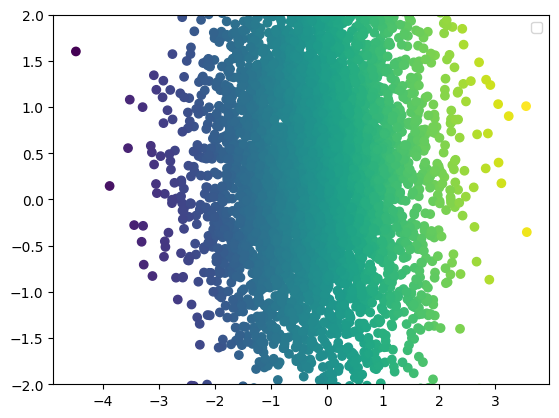

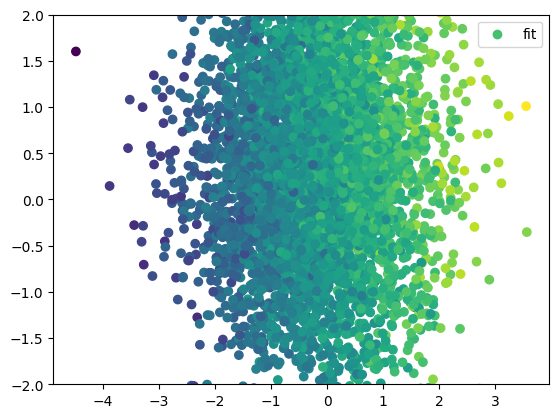

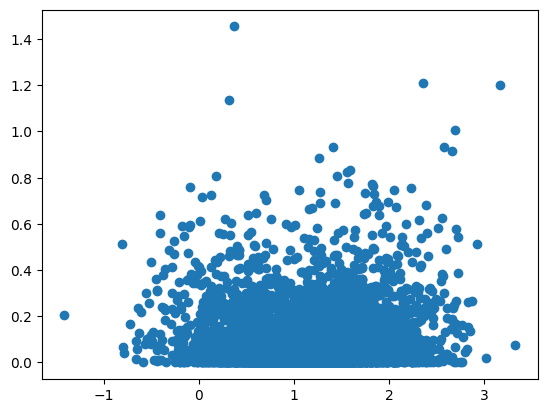

In [271]:
#now we try the same thing but we have two more parameters for every parameter
# we are parametrizing a normal distribution for every parameter value, this means that we 
#actually have six different values for every parameter, its mean value and its variance
#aka its loc and its scale, we will also include the prior as well
from torch.distributions import Normal
#here we define our optimizer ( we can try playing with the learning rate here!)

#now we are going to calculate a prior for things as well to see how that works and changes our regression
#now we use this optimizer to find the best parameter choices to calculate our polynomial
#we set up our priors for each parameter
relaxation = 1.0
#lets create a random tensor of parameters to start of degree 10
parameter_number = 3
parameter_means =torch.randn(parameter_number,dtype=torch.float32, requires_grad=True)
parameter_vars =torch.rand(parameter_number,dtype=torch.float32, requires_grad=True)
prior = Normal(loc=torch.zeros(parameter_number), scale=relaxation*torch.ones(parameter_number))

optimizer = torch.optim.Adam([parameter_means, parameter_vars], lr=0.01)
for epoch in range(1000):
    optimizer.zero_grad()
    #perform the reparam trick and sample from the guide
    epsilon= torch.randn(parameter_number)
    guide_sample= parameter_means + epsilon*parameter_vars.clamp(min=1e-10)
    #now we calculate how different things are from the prior
    likelihood_param = torch.sum(prior.log_prob(guide_sample))
    #then we calculate how off our y hat is
    y_hat = calculate_regression(guide_sample, x)
    likelihood_data = torch.sum(Normal(loc=y_hat,scale=1).log_prob(y))
    #now we sample the guide likelihood, we want this to be like the opposite of the prior
    #we want the guide point to be "unlikely" meaning that we want to make the variance very high
    #this means that the only way for things to work is to have very small variance bounds that are close to 
    #the prior and fit the data
    guide_likelihood = torch.sum(Normal(loc=parameter_means, scale=parameter_vars).log_prob(guide_sample)) 
    #then we combine them in the loss, why don't we log the mean loss?
    #its already a log! its the sum of the square loss which is the same as the 
    #log prob with a normal distribution describing the errors!!
    elbo = likelihood_data + likelihood_param - guide_likelihood 
    loss= -elbo
    loss.backward()
    optimizer.step()
    if epoch %100 ==0:
        print("parameter_tensor:",parameter_means, parameter_vars)
        print("overall_loss: ",loss.item())
        print("prior_loss: ",likelihood_param)
        print("accuracy loss; ",likelihood_data)
        print("guide loss; ",guide_likelihood)


#now we compare the true data with what we fitted
#plt.scatter(x1,x2,c=y_hat.detach().numpy(), label="fit")
plt.scatter(x1,x2,c=y_hat.detach().cpu().numpy())
plt.legend()
plt.ylim(-2,2)
plt.show()

plt.scatter(x1,x2,c=(y).detach().numpy(), label="fit")
#plt.tricontourf(x1,x2,y.detach().cpu().numpy(), levels=10, cmap="viridis")
plt.legend()
plt.ylim(-2,2)
plt.show()

plt.scatter(y.detach().cpu().numpy(), torch.square(y-y_hat).detach().cpu().numpy())
plt.show()